In [1]:
from IPython.display import HTML
HTML("<h2>次元削減とクラスタリング</h2>")

In [2]:
# 基本のライブラリを読み込む
import numpy as np
import pandas as pd
from scipy import stats
 
# グラフ描画
from matplotlib import pylab as plt
import seaborn as sns
%matplotlib inline
 
# グラフを横長にする
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

import matplotlib as mpl
mpl.rcParams['font.family'] = ['serif']

In [3]:
url = 'https://docs.google.com/spreadsheets/d/1X5Jp7Q8pTs3KLJ5JBWKhncVACGsg5v4xu6badNs4C7I/pub?gid=0&output=csv'
existing_df = pd.read_csv(url,
    index_col = 0, 
    thousands  = ',')
existing_df.index.names = ['country']
existing_df.columns.names = ['year']
dhead = existing_df.head()
print(dhead)

year            1990  1991  1992  1993  1994  1995  1996  1997  1998  1999  \
country                                                                      
Afghanistan      436   429   422   415   407   397   397   387   374   373   
Albania           42    40    41    42    42    43    42    44    43    42   
Algeria           45    44    44    43    43    42    43    44    45    46   
American Samoa    42    14     4    18    17    22     0    25    12     8   
Andorra           39    37    35    33    32    30    28    23    24    22   

year            2000  2001  2002  2003  2004  2005  2006  2007  
country                                                         
Afghanistan      346   326   304   308   283   267   251   238  
Albania           40    34    32    32    29    29    26    22  
Algeria           48    49    50    51    52    53    55    56  
American Samoa     8     6     5     6     9    11     9     5  
Andorra           20    20    21    18    19    18    17    19 

In [4]:
HTML("<h3>PCAを実行</h3>")

In [5]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(existing_df)
"""
http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
"""
pass

In [6]:
HTML("<h3>主成分の確認</h3>")

In [7]:
print("--- explained_variance_ratio_ ---")
print(pca.explained_variance_ratio_)
print("--- components ---")
print(pca.components_)
print("--- mean ---")
print(pca.mean_)
print("--- covariance ---")
print(pca.get_covariance())

--- explained_variance_ratio_ ---
[ 0.91808789  0.060556  ]
--- components ---
[[ 0.25583801  0.25470394  0.25141064  0.24772801  0.24449817  0.24141272
   0.2202353   0.21919471  0.2165391   0.22204506  0.22879832  0.23376061
   0.23077592  0.23574534  0.23472456  0.23435384  0.23355341  0.23217055]
 [ 0.33830021  0.31393233  0.29277268  0.26949215  0.23778166  0.20993393
   0.1208106   0.07301764  0.01743088 -0.05608852 -0.10059987 -0.16723358
  -0.20135595 -0.26801844 -0.27958111 -0.29766788 -0.29587202 -0.31605565]]
--- mean ---
[ 196.96618357  196.46859903  192.8115942   191.17391304  188.72463768
  187.94202899  178.89855072  180.97584541  178.12077295  180.47342995
  177.52173913  177.79710145  179.51690821  176.4057971   173.92270531
  171.18357488  169.01932367  167.25603865]
--- covariance ---
[[ 53732.64741829  52084.82476767  51141.11734954  50091.86097094
   48993.15076454  47982.20045345  42655.61242314  41707.77633366
   40337.96826418  40194.74777646  40740.73425847  40

In [8]:
HTML("<h3>データ変換</h3>")

In [9]:
existing_2d = pca.transform(existing_df)

existing_df_2d = pd.DataFrame(existing_2d)
existing_df_2d.index = existing_df.index
existing_df_2d.columns = ['PC1','PC2']
existing_df_2d.head()

,PC1,PC2
country,,
Afghanistan,732.215864,203.381494
Albania,-613.296510,4.715978
Algeria,-569.303713,-36.837051
American Samoa,-717.082766,5.464696
Andorra,-661.802241,11.037736


In [10]:
HTML("<h3>主成分のグラフ表示</h3>")

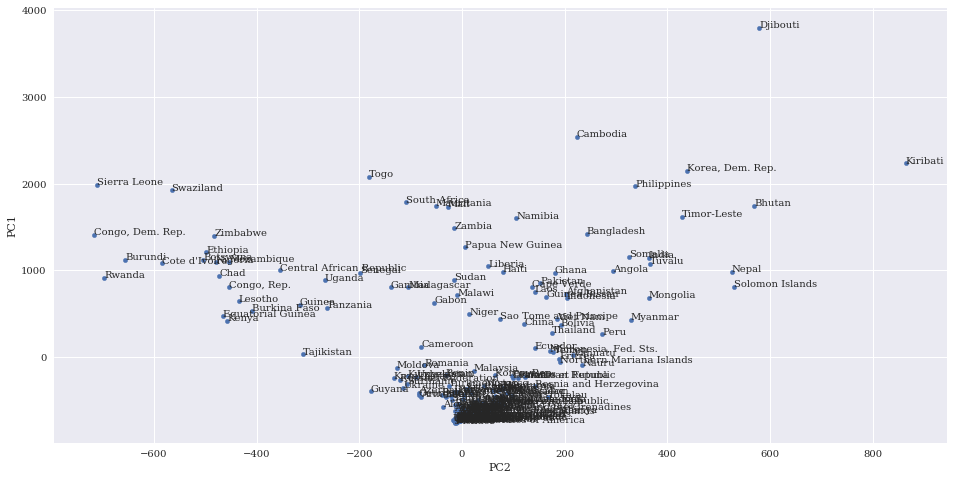

In [11]:
ax = existing_df_2d.plot(kind='scatter', x='PC2', y='PC1', figsize=(16,8))
for i, country in enumerate(existing_df.index):
    ax.annotate(  
        country,
       (existing_df_2d.iloc[i].PC2, existing_df_2d.iloc[i].PC1)
    )

In [12]:
HTML("<h3>平均値の追加</h3>")

In [13]:
from sklearn.preprocessing import normalize
existing_df_2d['country_mean'] = pd.Series(existing_df.mean(axis=1), index=existing_df_2d.index)
country_mean_max = existing_df_2d['country_mean'].max()
country_mean_min = existing_df_2d['country_mean'].min()
country_mean_scaled =(existing_df_2d.country_mean-country_mean_min) / country_mean_max
existing_df_2d['country_mean_scaled'] = pd.Series(
    country_mean_scaled,  index=existing_df_2d.index)

existing_df_2d.head()

,PC1,PC2,country_mean,country_mean_scaled
country,,,,
Afghanistan,732.215864,203.381494,353.333333,0.329731
Albania,-613.296510,4.715978,36.944444,0.032420
Algeria,-569.303713,-36.837051,47.388889,0.042234
American Samoa,-717.082766,5.464696,12.277778,0.009240
Andorra,-661.802241,11.037736,25.277778,0.021457


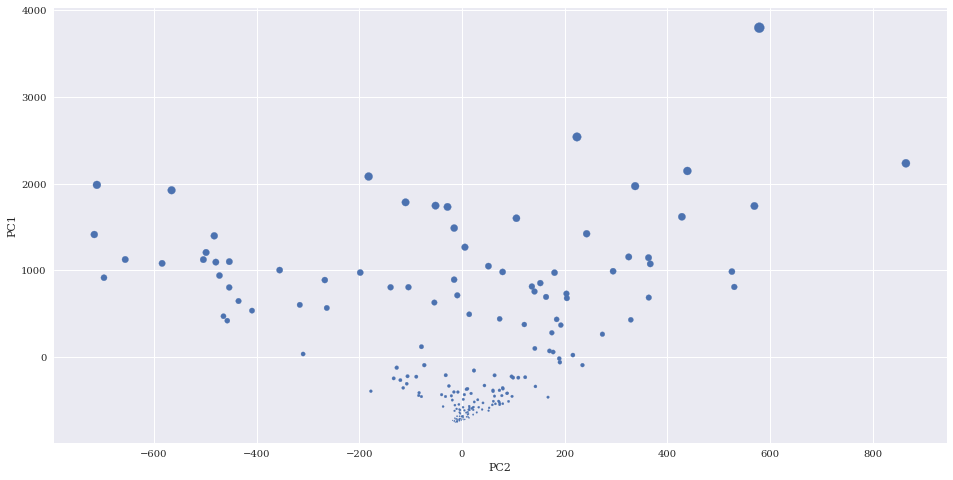

In [14]:
existing_df_2d.plot(kind='scatter',
    x='PC2', y='PC1',
    s=existing_df_2d['country_mean_scaled']*100,
    figsize=(16,8))

In [15]:
HTML("<h3>合計値の追加</h3>")

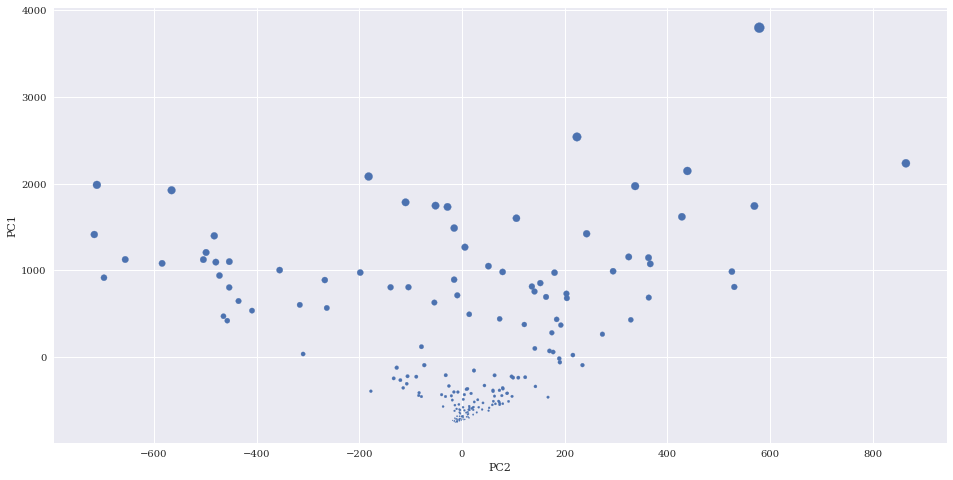

In [16]:
existing_df_2d['country_sum'] = pd.Series(
existing_df.sum(axis=1),
    index=existing_df_2d.index)
country_sum_max = existing_df_2d['country_sum'].max()
country_sum_min = existing_df_2d['country_sum'].min()
country_sum_scaled = (existing_df_2d.country_sum-country_sum_min) / country_sum_max
existing_df_2d['country_sum_scaled'] = pd.Series(
        country_sum_scaled,
        index=existing_df_2d.index)
existing_df_2d.plot(
    kind='scatter',
    x='PC2', y='PC1',
    s=existing_df_2d['country_sum_scaled']*100,
    figsize=(16,8))

In [17]:
HTML("<h3>変化量の関連付け</h3>")

In [18]:
existing_df_2d['country_change'] = pd.Series(
    existing_df['2007']-existing_df['1990'],
    index=existing_df_2d.index)
country_change_max = existing_df_2d['country_change'].max()
country_change_min = existing_df_2d['country_change'].min()
country_change_scaled = (existing_df_2d['country_change'] - country_change_min)/ country_change_max

existing_df_2d['country_change_scaled'] = pd.Series(
        country_change_scaled,
        index=existing_df_2d.index)
existing_df_2d[['country_change','country_change_scaled']].head()

,country_change,country_change_scaled
country,,
Afghanistan,-198,0.850840
Albania,-20,1.224790
Algeria,11,1.289916
American Samoa,-37,1.189076
Andorra,-20,1.224790


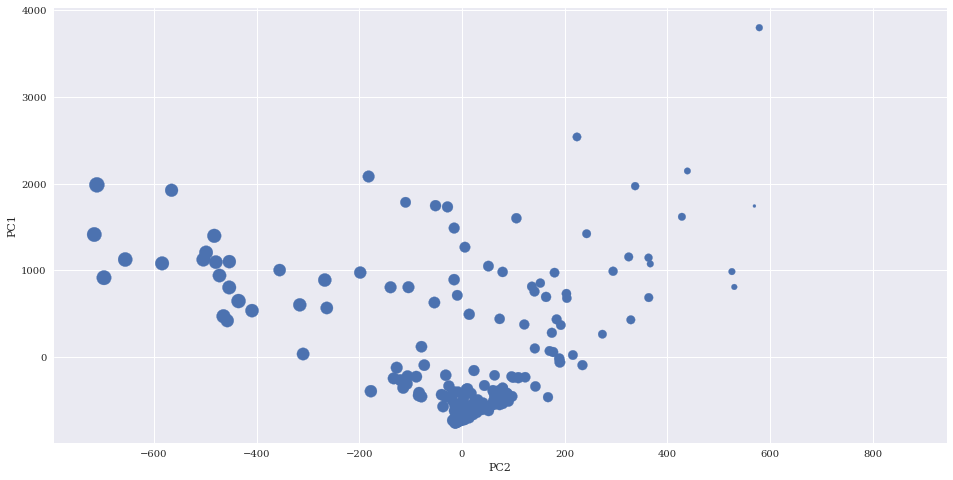

In [19]:
existing_df_2d.plot(
    kind='scatter',
    x='PC2', y='PC1',
    s=existing_df_2d['country_change_scaled']*100,
    figsize=(16,8))

In [20]:
from sklearn.cluster import KMeans   
kmeans = KMeans(n_clusters=5)
clusters = kmeans.fit(existing_df)

In [21]:
existing_df_2d['cluster'] = pd.Series(clusters.labels_, index=existing_df_2d.index)
print(existing_df_2d.cluster.astype(np.float))
print(clusters.labels_)
print(clusters.cluster_centers_)

country
Afghanistan                 1.0
Albania                     4.0
Algeria                     4.0
American Samoa              4.0
Andorra                     4.0
Angola                      1.0
Anguilla                    4.0
Antigua and Barbuda         4.0
Argentina                   4.0
Armenia                     0.0
Australia                   4.0
Austria                     4.0
Azerbaijan                  0.0
Bahamas                     4.0
Bahrain                     0.0
Bangladesh                  2.0
Barbados                    4.0
Belarus                     0.0
Belgium                     4.0
Belize                      4.0
Benin                       0.0
Bermuda                     4.0
Bhutan                      2.0
Bolivia                     1.0
Bosnia and Herzegovina      0.0
Botswana                    3.0
Brazil                      0.0
British Virgin Islands      4.0
Brunei Darussalam           0.0
Bulgaria                    4.0
                           ... 


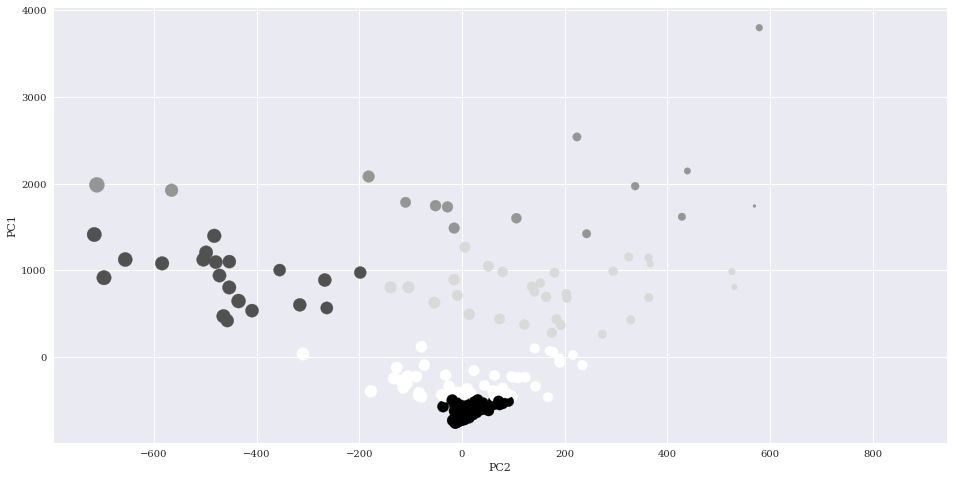

In [22]:
import numpy as np

existing_df_2d.plot(
        kind='scatter',
        x='PC2',y='PC1',
        c=existing_df_2d.cluster.astype(np.float),
        s=existing_df_2d['country_change_scaled']*100,
        figsize=(16,8))

In [23]:
HTML("<h3>クラスターのサンプル数の分布</h3>")

In [24]:
existing_df_2d['cluster'].value_counts()

4    90
0    51
1    30
3    20
2    16
Name: cluster, dtype: int64

In [25]:
print(clusters)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)


In [29]:
# クラスタ番号 = 0
existing_df_2d[existing_df_2d['cluster']==0].mean()

PC1                      -274.826387
PC2                        22.391851
country_mean              116.691721
country_mean_scaled         0.107358
country_sum              2100.450980
country_sum_scaled          0.107358
country_change            -38.921569
country_change_scaled       1.185039
cluster                     0.000000
dtype: float64

In [30]:
# クラスタ番号 = １
existing_df_2d[existing_df_2d['cluster']==1].mean()

PC1                       753.262501
PC2                       170.918634
country_mean              357.996296
country_mean_scaled         0.334113
country_sum              6443.933333
country_sum_scaled          0.334113
country_change           -163.700000
country_change_scaled       0.922899
cluster                     1.000000
dtype: float64

In [31]:
# クラスタ番号 = 2
existing_df_2d[existing_df_2d['cluster']==2].mean()

PC1                       1988.842909
PC2                        132.915838
country_mean               648.642361
country_mean_scaled          0.607234
country_sum              11675.562500
country_sum_scaled           0.607234
country_change            -168.250000
country_change_scaled        0.913340
cluster                      2.000000
dtype: float64

In [32]:
# クラスタ番号 = 3
existing_df_2d[existing_df_2d['cluster']==3].mean()

PC1                       916.120424
PC2                      -458.037358
country_mean              399.983333
country_mean_scaled         0.373568
country_sum              7199.700000
country_sum_scaled          0.373568
country_change            253.650000
country_change_scaled       1.799685
cluster                     3.000000
dtype: float64

In [33]:
# クラスタ番号 = 4
existing_df_2d[existing_df_2d['cluster']==4].mean()

PC1                     -652.506937
PC2                        8.495004
country_mean              27.560494
country_mean_scaled        0.023602
country_sum              496.088889
country_sum_scaled         0.023602
country_change           -18.166667
country_change_scaled      1.228641
cluster                    4.000000
dtype: float64

In [34]:
HTML("<h3>クラスターの重心の変動確認</h3>")

In [35]:
df = clusters.cluster_centers_
print(type(df))
print(df)
print("-----")
print(df[0])

<class 'numpy.ndarray'>
[[ 130.60784314  133.41176471  125.60784314  127.54901961  124.82352941
   127.70588235  121.68627451  130.50980392  125.82352941  124.45098039
   110.58823529  106.60784314  121.09803922  103.01960784  101.80392157
    97.29411765   96.17647059   91.68627451]
 [ 444.5         435.2         426.16666667  417.4         409.23333333
   400.56666667  378.6         365.36666667  358.03333333  354.43333333
   350.6         326.73333333  316.16666667  308.5         297.86666667
   288.8         284.96666667  280.8       ]
 [ 764.          751.1875      734.9375      718.0625      701.6875
   687.3125      624.75        621.625       605.1875      609.4375      622.
   635.5         604.25        601.125       597.375       601.125       600.25
   595.75      ]
 [ 259.85        278.9         287.3         298.05        309.          322.95
   335.          357.65        369.65        410.85        422.25        463.75
   492.45        525.25        523.6         519.9 

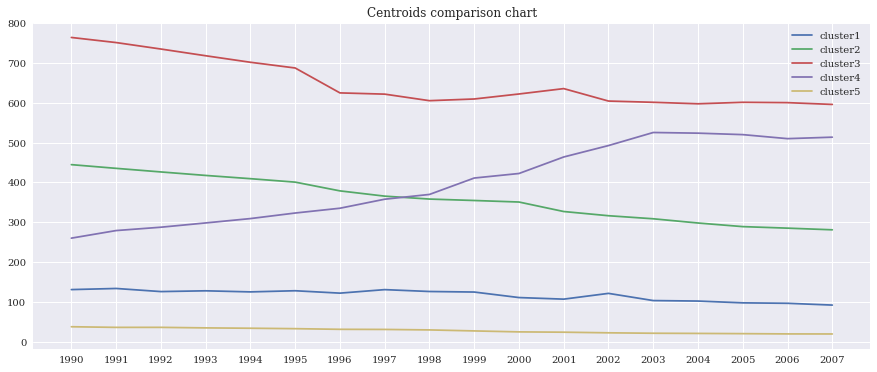

In [36]:
x = np.arange(1990, 2008)
fig, ax = plt.subplots()
for cl in range(0,5):
    ax.plot(x, df[cl], label='cluster'+str(cl + 1))
ax.set_xticks(x)
ax.set_xticklabels(x)
plt.title('Centroids comparison chart')
plt.legend(loc='best')


In [37]:
HTML("<h3>クラスター1</h3>")

In [38]:
# クラスタ番号 = 1
existing_df_2d[existing_df_2d['cluster']==0].mean()

PC1                      -274.826387
PC2                        22.391851
country_mean              116.691721
country_mean_scaled         0.107358
country_sum              2100.450980
country_sum_scaled          0.107358
country_change            -38.921569
country_change_scaled       1.185039
cluster                     0.000000
dtype: float64

In [39]:
existing_df_2d[existing_df_2d['cluster']==0]

,PC1,PC2,country_mean,country_mean_scaled,country_sum,country_sum_scaled,country_change,country_change_scaled,cluster
country,,,,,,,,,
Armenia,-454.552060,-78.986374,74.944444,0.068128,1349,0.068128,29,1.327731,0
Azerbaijan,-410.215266,-83.510757,85.611111,0.078152,1541,0.078152,28,1.325630,0
Bahrain,-443.480516,77.585555,76.388889,0.069486,1375,0.069486,-60,1.140756,0
Belarus,-432.631571,-39.693354,80.333333,0.073192,1446,0.073192,7,1.281513,0
Benin,-208.237408,-31.658052,132.444444,0.122161,2384,0.122161,-5,1.256303,0
Bosnia and Herzegovina,-337.633139,142.997336,100.944444,0.092561,1817,0.092561,-105,1.046218,0
Brazil,-394.477560,60.513236,88.055556,0.080449,1585,0.080449,-64,1.132353,0
Brunei Darussalam,-418.462708,17.711361,82.888889,0.075594,1492,0.075594,-26,1.212185,0
Cameroon,120.281096,-78.943508,210.388889,0.195406,3787,0.195406,7,1.281513,0


In [67]:
df[0]

array([ 130.60784314,  133.41176471,  125.60784314,  127.54901961,
        124.82352941,  127.70588235,  121.68627451,  130.50980392,
        125.82352941,  124.45098039,  110.58823529,  106.60784314,
        121.09803922,  103.01960784,  101.80392157,   97.29411765,
         96.17647059,   91.68627451])

In [68]:
HTML("<h3>クラスター2</h3>")

In [71]:
existing_df_2d[existing_df_2d['cluster']==1]

,PC1,PC2,country_mean,country_mean_scaled,country_sum,country_sum_scaled,country_change,country_change_scaled,cluster
country,,,,,,,,,
Afghanistan,732.215864,203.381494,353.333333,0.329731,6360,0.329731,-198,0.850840,1
Angola,990.536338,294.243725,413.444444,0.386218,7442,0.386218,-220,0.804622,1
Bolivia,369.739970,192.500210,267.000000,0.248603,4806,0.248603,-179,0.890756,1
Cape Verde,814.529926,136.122326,372.888889,0.348108,6712,0.348108,-169,0.911765,1
China,376.487336,121.359175,269.666667,0.251109,4854,0.251109,-133,0.987395,1
Gabon,629.550843,-53.777869,330.500000,0.308275,5949,0.308275,20,1.308824,1
Gambia,805.597013,-139.045983,372.222222,0.347481,6700,0.347481,54,1.380252,1
Ghana,974.039774,180.201039,409.333333,0.382354,7368,0.382354,-180,0.888655,1
Guinea-Bissau,694.477966,163.727958,344.833333,0.321744,6207,0.321744,-128,0.997899,1


In [73]:
df[1]

array([ 444.5       ,  435.2       ,  426.16666667,  417.4       ,
        409.23333333,  400.56666667,  378.6       ,  365.36666667,
        358.03333333,  354.43333333,  350.6       ,  326.73333333,
        316.16666667,  308.5       ,  297.86666667,  288.8       ,
        284.96666667,  280.8       ])

In [74]:
HTML("<h3>クラスター3</h3>")

In [75]:
existing_df_2d[existing_df_2d['cluster']==2]

,PC1,PC2,country_mean,country_mean_scaled,country_sum,country_sum_scaled,country_change,country_change_scaled,cluster
country,,,,,,,,,
Bangladesh,1422.800603,242.722083,515.444444,0.482067,9278,0.482067,-252,0.737395,2
Bhutan,1742.709249,569.448954,587.722222,0.549987,10579,0.549987,-561,0.088235,2
Cambodia,2538.953258,223.864004,778.611111,0.729366,14015,0.729366,-264,0.712185,2
"Korea, Dem. Rep.",2146.623299,438.945977,686.611111,0.642913,12359,0.642913,-400,0.426471,2
Djibouti,3798.447446,578.975277,1064.166667,0.997703,19155,0.997703,-381,0.466387,2
Kiribati,2234.809790,864.494075,702.888889,0.658209,12652,0.658209,-603,0.000000,2
Mali,1732.257902,-28.197847,589.500000,0.551658,10611,0.551658,-41,1.180672,2
Mauritania,1746.666128,-51.540677,594.333333,0.556199,10698,0.556199,-26,1.212185,2
Namibia,1601.720101,105.968321,555.000000,0.519238,9990,0.519238,-118,1.018908,2


In [76]:
df[2]

array([ 764.    ,  751.1875,  734.9375,  718.0625,  701.6875,  687.3125,
        624.75  ,  621.625 ,  605.1875,  609.4375,  622.    ,  635.5   ,
        604.25  ,  601.125 ,  597.375 ,  601.125 ,  600.25  ,  595.75  ])

In [77]:
HTML("<h3>クラスター4</h3>")

In [79]:
existing_df_2d[existing_df_2d['cluster']==3]

,PC1,PC2,country_mean,country_mean_scaled,country_sum,country_sum_scaled,country_change,country_change_scaled,cluster
country,,,,,,,,,
Botswana,1124.623706,-503.640618,448.166667,0.418846,8067,0.418846,278,1.850840,3
Burkina Faso,536.374072,-408.919486,310.166667,0.289167,5583,0.289167,224,1.737395,3
Burundi,1125.814696,-655.801897,449.833333,0.420412,8097,0.420412,359,2.021008,3
Central African Republic,1003.717739,-355.104319,419.833333,0.392221,7557,0.392221,107,1.491597,3
Chad,940.992223,-472.269062,406.444444,0.379640,7316,0.379640,246,1.783613,3
"Congo, Rep.",803.678138,-453.276487,375.277778,0.350352,6755,0.350352,276,1.846639,3
Cote d'Ivoire,1081.284247,-584.003605,438.888889,0.410128,7900,0.410128,290,1.876050,3
"Congo, Dem. Rep.",1413.943357,-716.079455,519.055556,0.485461,9343,0.485461,391,2.088235,3
Equatorial Guinea,471.741213,-464.509893,294.611111,0.274550,5303,0.274550,300,1.897059,3


In [80]:
df[3]

array([ 259.85,  278.9 ,  287.3 ,  298.05,  309.  ,  322.95,  335.  ,
        357.65,  369.65,  410.85,  422.25,  463.75,  492.45,  525.25,
        523.6 ,  519.9 ,  509.8 ,  513.5 ])

In [50]:
HTML("<h3>クラスター5</h3>")

In [53]:
existing_df_2d[existing_df_2d['cluster']==4]

,PC1,PC2,country_mean,country_mean_scaled,country_sum,country_sum_scaled,country_change,country_change_scaled,cluster
country,,,,,,,,,
Albania,-613.296510,4.715978,36.944444,0.032420,665,0.032420,-20,1.224790,4
Algeria,-569.303713,-36.837051,47.388889,0.042234,853,0.042234,11,1.289916,4
American Samoa,-717.082766,5.464696,12.277778,0.009240,221,0.009240,-37,1.189076,4
Andorra,-661.802241,11.037736,25.277778,0.021457,455,0.021457,-20,1.224790,4
Anguilla,-618.891169,-14.502928,35.611111,0.031167,641,0.031167,-4,1.258403,4
Antigua and Barbuda,-723.656796,-5.371258,10.833333,0.007883,195,0.007883,-7,1.252101,4
Argentina,-508.244158,61.039700,61.222222,0.055234,1102,0.055234,-61,1.138655,4
Australia,-742.575408,-13.748824,6.444444,0.003759,116,0.003759,-1,1.264706,4
Austria,-715.906806,-5.969220,12.666667,0.009606,228,0.009606,-8,1.250000,4


In [81]:
df[4]

array([ 37.27777778,  35.68888889,  35.73333333,  34.4       ,
        33.51111111,  32.42222222,  30.8       ,  30.51111111,
        29.3       ,  26.77777778,  24.35555556,  23.57777778,
        22.02222222,  20.93333333,  20.48888889,  19.92222222,
        19.25555556,  19.11111111])

In [82]:
HTML("<h3>クラスター5をさらに二つにクラスタリング</h3>")

In [83]:
# datasetcluster5_df　　クラスター5のみに絞ったデータセット
existing_df['cluster'] = pd.Series(clusters.labels_, index=existing_df.index)
datasetcluster5_df = existing_df[existing_df['cluster']==4] 

# k-meansで二つに分類してみる
kmeans2 = KMeans(n_clusters=2)
cluster5_clustering = kmeans2.fit(datasetcluster5_df)

In [84]:
# 主成分1、主成分2と平均、合計の集計値のクラスター5のみの集計値
#print(cluster5_clustering)
existing_cl5_df_2d = existing_df_2d[existing_df_2d['cluster'] == 4]
print(existing_cl5_df_2d.head(20))

                               PC1        PC2  country_mean  \
country                                                       
Albania                -613.296510   4.715978     36.944444   
Algeria                -569.303713 -36.837051     47.388889   
American Samoa         -717.082766   5.464696     12.277778   
Andorra                -661.802241  11.037736     25.277778   
Anguilla               -618.891169 -14.502928     35.611111   
Antigua and Barbuda    -723.656796  -5.371258     10.833333   
Argentina              -508.244158  61.039700     61.222222   
Australia              -742.575408 -13.748824      6.444444   
Austria                -715.906806  -5.969220     12.666667   
Bahamas                -553.237930 -13.787740     51.111111   
Barbados               -747.393482  -9.335381      5.277778   
Belgium                -715.779552  -8.732092     12.722222   
Belize                 -565.111003  14.060593     48.000000   
Bermuda                -738.452782 -10.165310      7.38

In [85]:
# 主成分1、主成分2と平均、合計の集計値のクラスター5のみの集計値
#  ＋ 二段階目のクラスタリング結果(cluster5=0,1)付与
df_label = pd.DataFrame(cluster5_clustering.labels_, index=existing_cl5_df_2d.index)
df_label.columns = ['cluster5']

datasetcluster5_df = pd.concat([existing_cl5_df_2d, df_label], axis=1)
print(datasetcluster5_df.head(20))

                               PC1        PC2  country_mean  \
country                                                       
Albania                -613.296510   4.715978     36.944444   
Algeria                -569.303713 -36.837051     47.388889   
American Samoa         -717.082766   5.464696     12.277778   
Andorra                -661.802241  11.037736     25.277778   
Anguilla               -618.891169 -14.502928     35.611111   
Antigua and Barbuda    -723.656796  -5.371258     10.833333   
Argentina              -508.244158  61.039700     61.222222   
Australia              -742.575408 -13.748824      6.444444   
Austria                -715.906806  -5.969220     12.666667   
Bahamas                -553.237930 -13.787740     51.111111   
Barbados               -747.393482  -9.335381      5.277778   
Belgium                -715.779552  -8.732092     12.722222   
Belize                 -565.111003  14.060593     48.000000   
Bermuda                -738.452782 -10.165310      7.38

In [86]:
datasetcluster5_df['cluster5'].value_counts()

1    51
0    39
Name: cluster5, dtype: int64

In [87]:
# 二段階目のクラスタリングしたさいの重心値
df2 = cluster5_clustering.cluster_centers_
print(df2)

[[ 62.51282051  60.38461538  60.51282051  58.33333333  57.41025641
   56.02564103  53.92307692  53.53846154  52.25641026  46.28205128
   41.87179487  40.1025641   37.35897436  35.58974359  34.43589744
   33.38461538  32.1025641   31.69230769   4.        ]
 [ 17.98039216  16.80392157  16.78431373  16.09803922  15.23529412
   14.37254902  13.11764706  12.90196078  11.74509804  11.8627451
   10.96078431  10.94117647  10.29411765   9.7254902    9.82352941
    9.62745098   9.43137255   9.49019608   4.        ]]


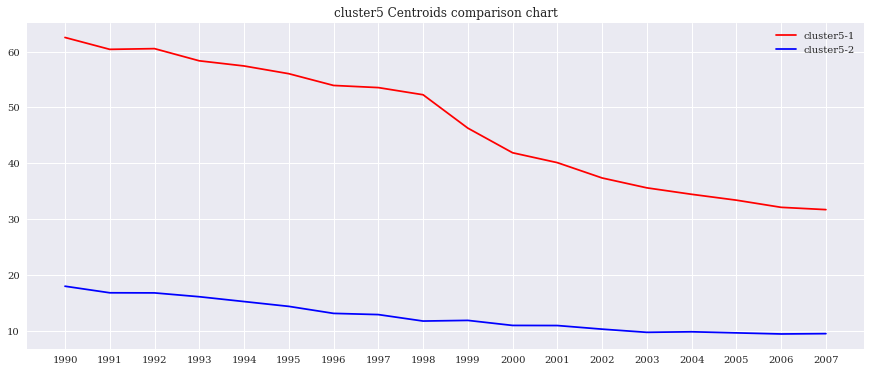

In [88]:
# 二段階目のクラスタリングしたさいの重心値のグラフ表示
x = np.arange(1990, 2008)
fig, ax = plt.subplots()

ax.plot(x, df2[0,0:18], label='cluster5-1', color='r')
ax.plot(x, df2[1,0:18], label='cluster5-2', color='b')
ax.set_xticks(x)
ax.set_xticklabels(x)
plt.title('cluster5 Centroids comparison chart')
plt.legend(loc='best')

In [89]:
"""
cluster5-1 の国データ
"""
print(datasetcluster5_df[datasetcluster5_df['cluster5']==0])

                                         PC1        PC2  country_mean  \
country                                                                 
Albania                          -613.296510   4.715978     36.944444   
Algeria                          -569.303713 -36.837051     47.388889   
Anguilla                         -618.891169 -14.502928     35.611111   
Argentina                        -508.244158  61.039700     61.222222   
Bahamas                          -553.237930 -13.787740     51.111111   
Belize                           -565.111003  14.060593     48.000000   
Bulgaria                         -544.874902  -6.043780     53.333333   
Colombia                         -491.294650  30.672246     65.388889   
Egypt                            -604.766469  12.869140     38.888889   
Estonia                          -486.642717   2.547315     67.444444   
Fiji                             -577.491692  32.590530     45.055556   
French Polynesia                 -538.327109  65.05

In [90]:
"""
cluster5-2 の国データ
"""
print(datasetcluster5_df[datasetcluster5_df['cluster5']==1])

                                 PC1        PC2  country_mean  \
country                                                         
American Samoa           -717.082766   5.464696     12.277778   
Andorra                  -661.802241  11.037736     25.277778   
Antigua and Barbuda      -723.656796  -5.371258     10.833333   
Australia                -742.575408 -13.748824      6.444444   
Austria                  -715.906806  -5.969220     12.666667   
Barbados                 -747.393482  -9.335381      5.277778   
Belgium                  -715.779552  -8.732092     12.722222   
Bermuda                  -738.452782 -10.165310      7.388889   
British Virgin Islands   -679.056460   2.317492     21.277778   
Canada                   -748.125458 -11.062861      5.111111   
Cayman Islands           -739.387791  -9.104772      7.166667   
Chile                    -662.228202  21.763156     25.111111   
Cook Islands             -684.975871   0.804587     19.833333   
Costa Rica               

In [91]:
existing_df.sum()[0:18]

year
1990    40772
1991    40669
1992    39912
1993    39573
1994    39066
1995    38904
1996    37032
1997    37462
1998    36871
1999    37358
2000    36747
2001    36804
2002    37160
2003    36516
2004    36002
2005    35435
2006    34987
2007    34622
dtype: int64

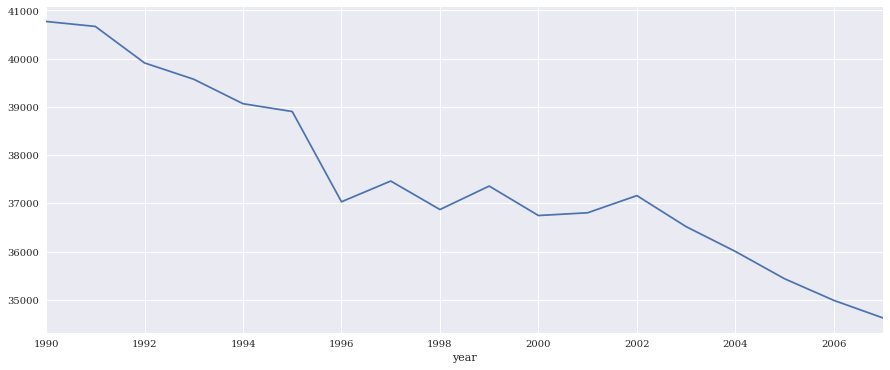

In [92]:
existing_df.sum(axis=0)[0:18].plot()